In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd

import file_paths
import data_manager as dm
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size':15})

In [2]:
df = dm.load_data("setup_culindric_diameters_and_distances.csv")

In [3]:
df['date'] =  df.date.str.replace("_", "/")
df['date'] = pd.to_datetime(df.date)

In [5]:
dm.save_dataframe(df, "diameters_and_distances.xlsx")

In [6]:
df

,polimer_type,sample_number,median_diameters,mean_diameters,standard_dev_diameters,mean_distances,median_distances,standard_dev_distances,date
0,PDL-05,1,158.971687,280.102140,464.863859,256.310704,155.968142,300.912670,2020-03-18
1,PDL-05,1,195.530050,363.114223,618.461968,263.364020,162.718354,357.486486,2020-06-09
2,PDL-05,1,184.883234,356.537796,676.633268,277.565218,164.446493,420.513298,2020-06-16
3,PDL-05,1,188.785595,409.992156,803.748612,297.688237,176.694737,449.722489,2020-06-23
4,PDL-05,1,192.187408,405.771915,827.434063,305.572312,180.640208,459.264933,2020-06-30
5,PDL-05,2,137.083918,279.394993,492.398928,251.201602,148.623155,307.845370,2020-03-18
6,PDL-05,2,132.272447,280.249540,524.453002,271.415656,147.596722,369.889354,2020-06-09
7,PDL-05,2,179.097731,439.242846,850.632085,319.839038,187.260035,455.168923,2020-06-16
8,PDL-05,2,169.811657,427.463408,863.688497,304.106356,188.586319,457.638541,2020-06-23
9,PDL-05,2,201.246117,396.293989,738.892519,253.555147,162.818175,355.495878,2020-06-30


Timestamp('2020-03-17 00:00:00')

In [4]:
(df['date']-df['date'].min())[2].days

91

In [14]:
# def plot_diameters(polymer_type, df=df):
#     df = df[df.polimer_type==polymer_type]

#     fig, ax = plt.subplots(figsize=(7, 7), constrained_layout=True)

#     colors = ["blue", "black", "red"]
#     markers = ["o", "^", "x"]
#     labels = []
#     for sample_number, color, marker in zip(np.flip(df.sample_number.unique()), colors, markers):
#         df_for_1_sample = df[df.sample_number==sample_number].reset_index()

#         delta_t = (df_for_1_sample['date']-df_for_1_sample['date'].min())
#         radii = np.asarray([delta_t[i].days for i in range(len(df_for_1_sample))])

#         s = [40+0.0000001*r**5 for r in radii]

#         labels.append(mpatches.Patch(color=color, label=polymer_type+f" образец {sample_number}"))
#         df_for_1_sample.plot(kind="scatter",
#                              x="mean_diameters",
#                              y="standard_dev_diameters",
#                              ax=ax,
#                              c=color,
#                              s=s,
#                              marker=marker
#                              )
    
#     ax.set_xlabel("Средний диаметр, мкм")
#     ax.set_ylabel("Среднеквадратичн. отклонение, мкм")
#     ax.set_title("Диаметры пор")
#     ax.legend(loc=4, handles=labels)

In [9]:
def plot_diameters(polymer_type, df=df):
    df = df[df.polimer_type==polymer_type]

    fig, ax = plt.subplots(figsize=(7, 7), constrained_layout=True)

    colors = ["blue", "black", "red"]
    markers = ["o", "^", "x"]
    labels = []
    for sample_number, color, marker in zip(np.flip(df.sample_number.unique()), colors, markers):
        df_for_1_sample = df[df.sample_number==sample_number].reset_index()
        df_for_1_sample.date = ['исходный \n (сухой)'] + [f"неделя {i+1}" for i in range(4)]

        s = np.pi*(df_for_1_sample["standard_dev_diameters"].to_numpy()**2) / 10_000

        labels.append(mpatches.Patch(color=color, label=polymer_type+f" образец {sample_number}"))
        df_for_1_sample.plot(kind="scatter",
                             x="date",
                             y="standard_dev_diameters",
                             ax=ax,
                             c=color,
                             s=s,
                             marker=marker
                             )
    
    ax.set_xlabel("дата измерений")
    ax.set_ylabel("Средний диаметр, мкм")
    ax.set_title("Диаметры пор")

    ax.legend(loc=4, handles=labels)
    ax.set_ylim(bottom=0, top=2300)
    plt.xticks(rotation='vertical')

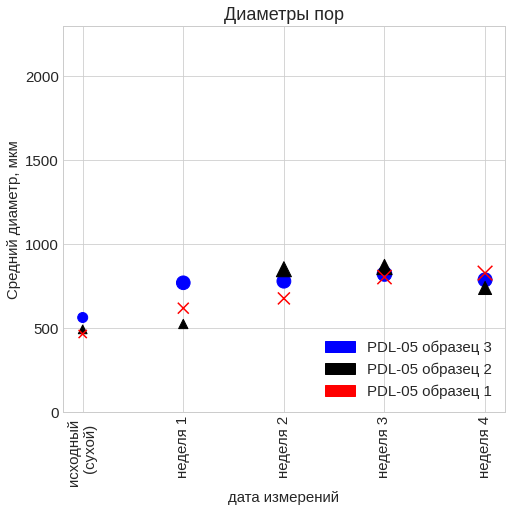

In [10]:
plot_diameters("PDL-05")

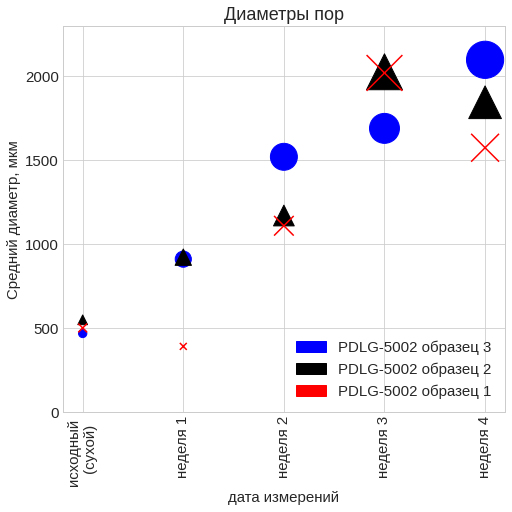

In [11]:
plot_diameters("PDLG-5002")

In [13]:
# def plot_distances(polymer_type, df=df):
#     df = df[df.polimer_type==polymer_type]

#     fig, ax = plt.subplots(figsize=(7, 7), constrained_layout=True)

#     colors = ["blue", "black", "red"]
#     markers = ["o", "^", "x"]
#     labels = []
#     for sample_number, color, marker in zip(np.flip(df.sample_number.unique()), colors, markers):
#         df_for_1_sample = df[df.sample_number==sample_number].reset_index()

#         delta_t = (df_for_1_sample['date']-df_for_1_sample['date'].min())
#         radii = np.asarray([delta_t[i].days for i in range(len(df_for_1_sample))])

#         s = [40+0.0000001*r**5 for r in radii]

#         labels.append(mpatches.Patch(color=color, label=polymer_type+f" образец {sample_number}"))
#         df_for_1_sample.plot(kind="scatter",
#                              x="mean_distances",
#                              y="standard_dev_distances",
#                              ax=ax,
#                              c=color,
#                              s=s,
#                              marker=marker
#                              )
    
#     ax.set_xlabel("Среднее расстояние, мкм")
#     ax.set_ylabel("Среднеквадратичн. отклонение, мкм")
#     ax.set_title("Расстояние между порами")
#     ax.legend(loc=4, handles=labels)

In [32]:
def plot_distances(polymer_type, df=df):
    df = df[df.polimer_type==polymer_type]

    fig, ax = plt.subplots(figsize=(7, 7), constrained_layout=True)

    colors = ["blue", "black", "red"]
    markers = ["o", "^", "x"]
    labels = []
    for sample_number, color, marker in zip(np.flip(df.sample_number.unique()), colors, markers):
        df_for_1_sample = df[df.sample_number==sample_number].reset_index()
        df_for_1_sample.date = ['исходный \n (сухой)'] + [f"неделя {i+1}" for i in range(4)]

        s = np.pi*(df_for_1_sample["standard_dev_distances"].to_numpy()**2) / 10_000

        labels.append(mpatches.Patch(color=color, label=polymer_type+f" образец {sample_number}"))
        df_for_1_sample.plot(kind="scatter",
                             x="date",
                             y="mean_distances",
                             ax=ax,
                             c=color,
                             s=s,
                             marker=marker
                             )
    
    ax.set_xlabel("дата измерений")
    ax.set_ylabel("Среднее расстояние, мкм")
    ax.set_title("Расстояние между порами")

    ax.legend(loc=9, handles=labels)
    ax.set_ylim(bottom=0, top=1300)
    plt.xticks(rotation='vertical')

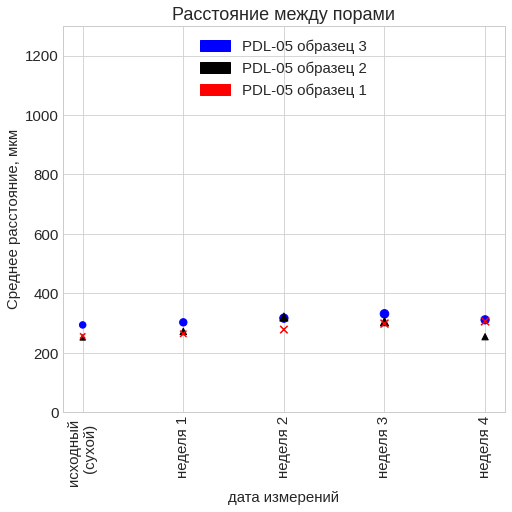

In [33]:
plot_distances("PDL-05")

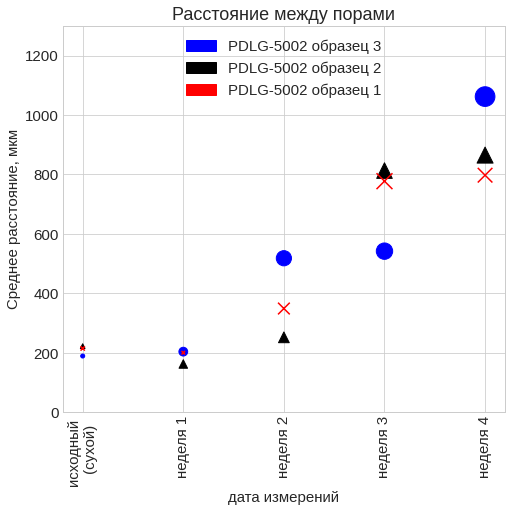

In [34]:
plot_distances("PDLG-5002")

# Distributions

In [ ]:
for polimer_type in ["PDL-05", "PDLG-5002"]:
    sample_id = 1

    paths = file_paths.get_benchtop_setup_paths(polimer_type)

    for sample_id in range(len(paths)):
        sample_name = list(paths.keys())[sample_id]